|Algorithm|	Solver|	Description|
|-----------|------------|--------------|
|Linear Regression|	Ordinary Least Squares (OLS)|	Solves for the best-fit line by minimizing the sum of the squared differences between predicted and actual values. Define the linear relationship between the dependent variable and the independent variables: $$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n + \epsilon $$  The parameters 𝛽 are found by minimizing the sum of the squared residuals (the differences between the observed and predicted values). The normal equation is: $$ \beta = (X^T X)^{-1} X^T y $$ Here, 𝑋 is the matrix of features, and 𝑦 is the vector of target values.|
|Linear Regression| Gradient Descent, Stochastic Gradient Descent|1. Initialization: Start by initializing the parameters (weights and biases) randomly or using some heuristics. 2. Compute the Prediction: Use the current parameters to predict the output of the model. 3. Calculate the Loss: Compute the loss function, which measures the difference between the predicted output and the actual output. Common loss functions include Mean Squared Error (MSE) for regression and Cross-Entropy Loss for classification. Mean Squared Error (MSE): $$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y{(i)})2 $$ 3. Compute the Gradient: Calculate the gradient of the loss function with respect to each parameter. The gradient is a vector of partial derivatives, which indicates the direction of the steepest ascent. For example, in MSE, the gradient with respect to 𝜃 is $$∇𝜃𝐽(𝜃)=(1/𝑚)𝑋^𝑇(𝑋⋅𝜃−𝑦)$$ 4. Update Rule: Parameters are updated using the gradient of the cost function: $$ \theta := \theta - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)}) x^{(i)} $$ Where 𝛼 is the learning rate. or $$𝜃𝑡+1=𝜃𝑡−𝜂∇𝜃𝐽(𝜃𝑡) $$ 5. Repeat: Repeat steps 2-5 for a set number of iterations or until the loss converges to a minimum (i.e., the changes in loss are below a predefined threshold). 6. (Optional) Stochastic Variants: Instead of using the entire dataset to compute the gradient, you can use a subset (mini-batch) or a single example. This leads to variants like Stochastic Gradient Descent (SGD) and Mini-batch Gradient Descent.|
|Logistic Regression|	LBFGS, Newton-CG, SAG, SAGA| Used for binary classification, predicts probabilities using the sigmoid function.|
|Decision Trees|	CART, ID3, C4.5|	Splits data into subsets based on feature values to create a tree-like model of decisions.|
|Random Forest|	Bagging, Bootstrap Aggregation|	Ensemble method that creates multiple decision trees and merges them for better accuracy and stability.
|Support Vector Machines (SVM)|	SMO (Sequential Minimal Optimization)|	Finds the hyperplane that best separates classes in a high-dimensional space.
|K-Nearest Neighbors (KNN)|	Brute Force, KD-Tree, Ball Tree|	Classifies data based on the majority class among the k-nearest neighbors.|
|Naive Bayes|	Gaussian, Multinomial, Bernoulli|	Uses Bayes’ Theorem to predict class probabilities, assuming independence among predictors.|
|Gradient Boosting Machines (GBM)|	Gradient Boosting|	Builds an ensemble of weak models by optimizing a loss function through gradient descent.|
|AdaBoost|	AdaBoost Algorithm	|Combines multiple weak classifiers to create a strong classifier by reweighting misclassified instances.|
|XGBoost|	XGBoost Algorithm|	Optimized implementation of gradient boosting for speed and performance.
|K-Means Clustering|	Lloyd's Algorithm, Elkan's Algorithm|	Partitions data into k clusters by minimizing within-cluster variance.|
|DBSCAN|	Density-Based Clustering|	Identifies clusters based on density, separating noise from dense regions.|
|Principal Component Analysis (PCA)|	Singular Value Decomposition (SVD)|	Reduces dimensionality by transforming data to a new coordinate system with maximal variance.|
|Linear Discriminant Analysis (LDA)|	Eigenvalue Decomposition|	Finds the linear combinations of features that best separate two or more classes.|
|Neural Networks|	Backpropagation, Adam, RMSProp|	Multi-layered models that learn complex patterns through non-linear transformations.|

### OLS

Mean squared error: 2548.07
Coefficient of determination: 0.47


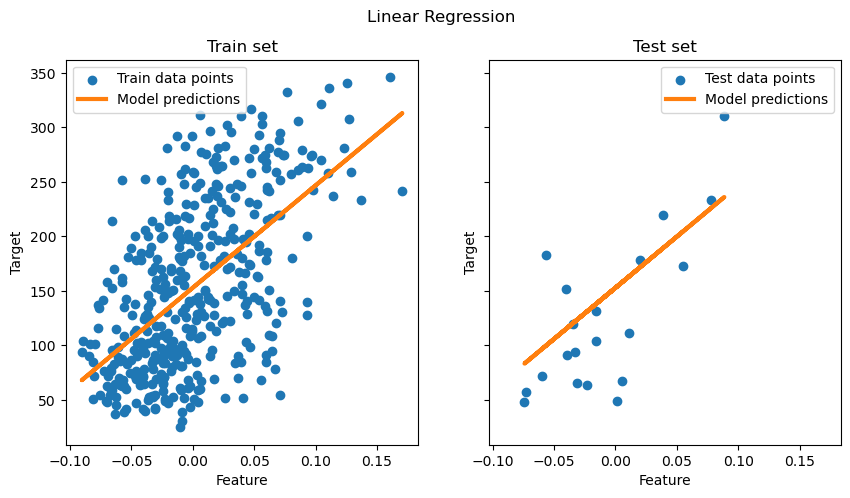

In [1]:
"""
==============================
Ordinary Least Squares Example
==============================

This example shows how to use the ordinary least squares (OLS) model
called :class:`~sklearn.linear_model.LinearRegression` in scikit-learn.

For this purpose, we use a single feature from the diabetes dataset and try to
predict the diabetes progression using this linear model. We therefore load the
diabetes dataset and split it into training and test sets.

Then, we fit the model on the training set and evaluate its performance on the test
set and finally visualize the results on the test set.
"""

# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

# %%
# Data Loading and Preparation
# ----------------------------
#
# Load the diabetes dataset. For simplicity, we only keep a single feature in the data.
# Then, we split the data and target into training and test sets.
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

X, y = load_diabetes(return_X_y=True)
X = X[:, [2]]  # Use only one feature
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, shuffle=False)

# %%
# Linear regression model
# -----------------------
#
# We create a linear regression model and fit it on the training data. Note that by
# default, an intercept is added to the model. We can control this behavior by setting
# the `fit_intercept` parameter.
from sklearn.linear_model import LinearRegression

regressor = LinearRegression().fit(X_train, y_train)

# %%
# Model evaluation
# ----------------
#
# We evaluate the model's performance on the test set using the mean squared error
# and the coefficient of determination.
from sklearn.metrics import mean_squared_error, r2_score

y_pred = regressor.predict(X_test)

print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred):.2f}")

# %%
# Plotting the results
# --------------------
#
# Finally, we visualize the results on the train and test data.
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2, figsize=(10, 5), sharex=True, sharey=True)

ax[0].scatter(X_train, y_train, label="Train data points")
ax[0].plot(
    X_train,
    regressor.predict(X_train),
    linewidth=3,
    color="tab:orange",
    label="Model predictions",
)
ax[0].set(xlabel="Feature", ylabel="Target", title="Train set")
ax[0].legend()

ax[1].scatter(X_test, y_test, label="Test data points")
ax[1].plot(X_test, y_pred, linewidth=3, color="tab:orange", label="Model predictions")
ax[1].set(xlabel="Feature", ylabel="Target", title="Test set")
ax[1].legend()

fig.suptitle("Linear Regression")

plt.show()

# %%
# Conclusion
# ----------
#
# The trained model corresponds to the estimator that minimizes the mean squared error
# between the predicted and the true target values on the training data. We therefore
# obtain an estimator of the conditional mean of the target given the data.
#
# Note that in higher dimensions, minimizing only the squared error might lead to
# overfitting. Therefore, regularization techniques are commonly used to prevent this
# issue, such as those implemented in :class:`~sklearn.linear_model.Ridge` or
# :class:`~sklearn.linear_model.Lasso`.
